In [2]:
import pandas as pd
df = pd.read_csv('../data/01_raw/telco-customer-churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Data Preprocessing
# Convert TotalCharges to numeric (it's currently object type)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any NaN values created by conversion
print(f"NaN values in TotalCharges after conversion: {df['TotalCharges'].isna().sum()}")

# Fill NaN with 0 (new customers with tenure=0)
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Convert Churn to binary
df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(f"\nDataset shape: {df.shape}")

NaN values in TotalCharges after conversion: 11

Dataset shape: (7043, 22)


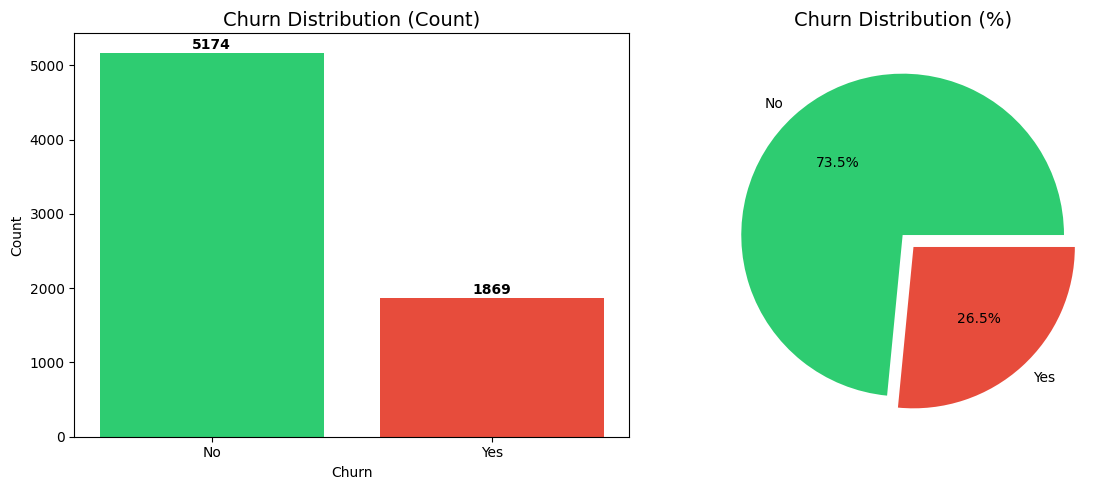


📊 Churn Rate: 26.54%
📊 Retention Rate: 73.46%
📊 Class Imbalance Ratio: 1:2.77


In [8]:
# 1. CHURN RATE ANALYSIS - Target Variable Distribution
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Churn count
churn_counts = df['Churn'].value_counts()
axes[0].bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution (Count)', fontsize=14)
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Churn percentage
churn_pct = df['Churn'].value_counts(normalize=True) * 100
axes[1].pie(churn_pct, labels=churn_pct.index, autopct='%1.1f%%', 
            colors=['#2ecc71', '#e74c3c'], explode=[0, 0.1])
axes[1].set_title('Churn Distribution (%)', fontsize=14)

plt.tight_layout()
plt.show()

print(f"\n📊 Churn Rate: {churn_pct['Yes']:.2f}%")
print(f"📊 Retention Rate: {churn_pct['No']:.2f}%")
print(f"📊 Class Imbalance Ratio: 1:{churn_pct['No']/churn_pct['Yes']:.2f}")

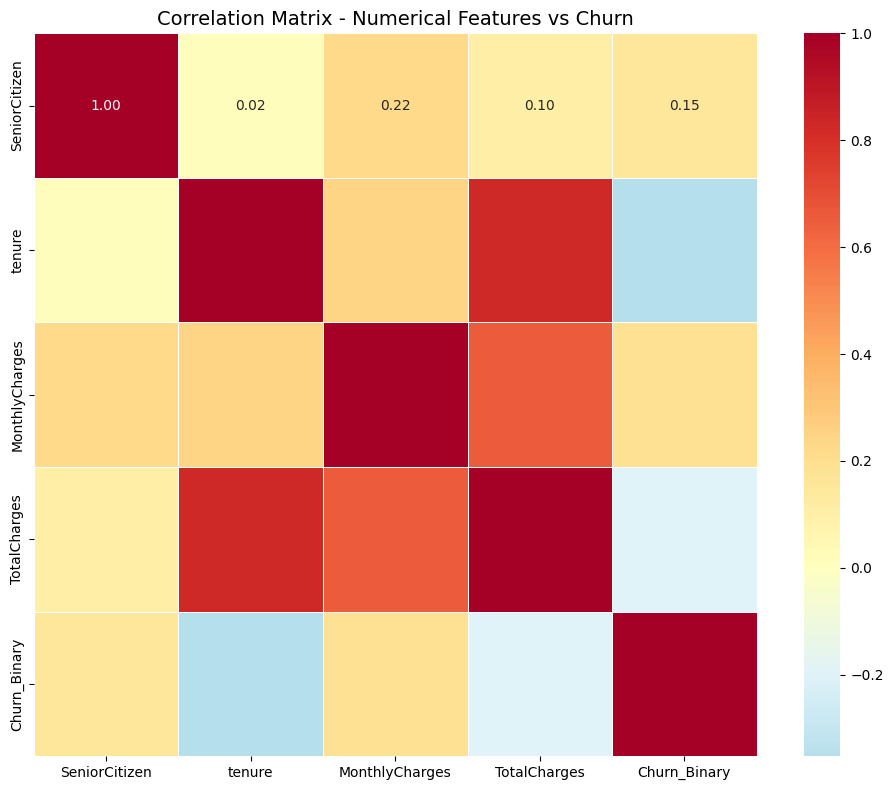


🔗 Correlation with Churn:
  tenure: -0.352 (↓ Negative)
  TotalCharges: -0.198 (↓ Negative)
  MonthlyCharges: 0.193 (↑ Positive)
  SeniorCitizen: 0.151 (↑ Positive)


In [9]:
# 2. CORRELATION ANALYSIS - Understanding Feature Relationships
import numpy as np

# Select numerical columns
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Binary']

# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features vs Churn', fontsize=14)
plt.tight_layout()
plt.show()

# Key correlations with Churn
print("\n🔗 Correlation with Churn:")
churn_corr = correlation_matrix['Churn_Binary'].drop('Churn_Binary').sort_values(key=abs, ascending=False)
for feature, corr in churn_corr.items():
    direction = "↑ Positive" if corr > 0 else "↓ Negative"
    print(f"  {feature}: {corr:.3f} ({direction})")

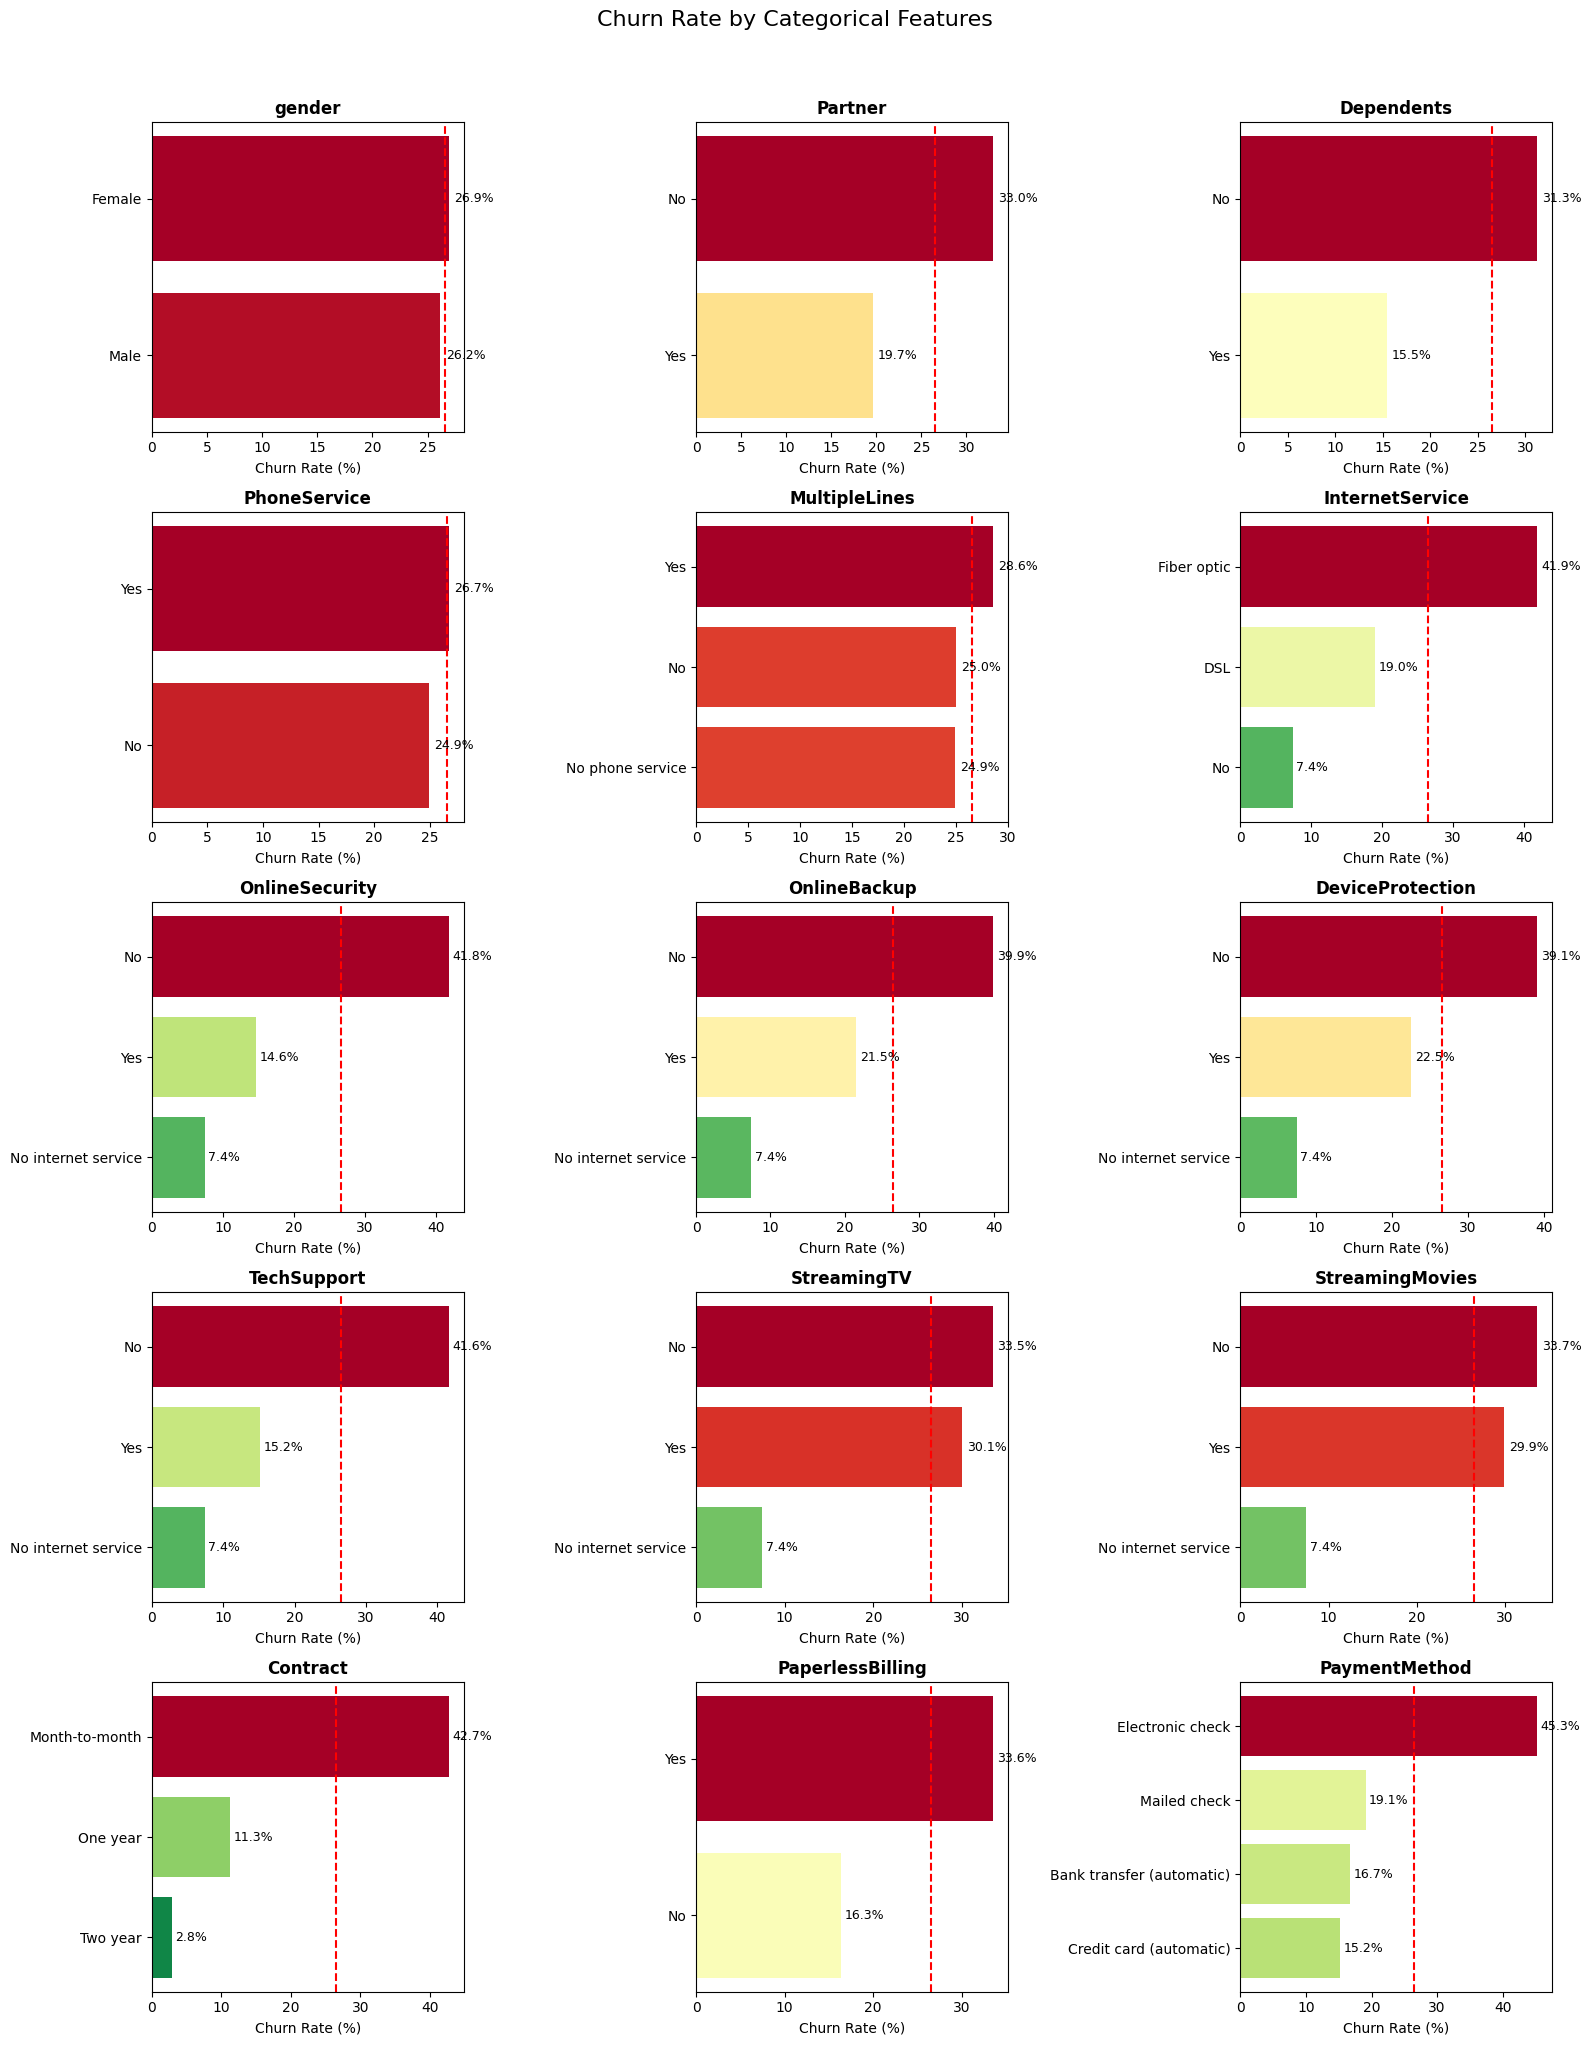

In [10]:
# 3. CATEGORICAL FEATURE ANALYSIS BY CHURN
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod']

# Calculate churn rate for each category
fig, axes = plt.subplots(5, 3, figsize=(16, 20))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    churn_rate = df.groupby(col)['Churn_Binary'].mean() * 100
    churn_rate = churn_rate.sort_values(ascending=True)
    
    colors = plt.cm.RdYlGn_r(churn_rate / churn_rate.max())
    bars = axes[idx].barh(churn_rate.index, churn_rate.values, color=colors)
    axes[idx].set_xlabel('Churn Rate (%)')
    axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[idx].axvline(x=df['Churn_Binary'].mean() * 100, color='red', 
                      linestyle='--', label='Overall Avg')
    
    # Add values on bars
    for bar, val in zip(bars, churn_rate.values):
        axes[idx].text(val + 0.5, bar.get_y() + bar.get_height()/2, 
                      f'{val:.1f}%', va='center', fontsize=9)

plt.suptitle('Churn Rate by Categorical Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

/Users/nabin/miniconda/envs/kedro-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nabin/miniconda/envs/kedro-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nabin/miniconda/envs/kedro-test/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/nabin/miniconda/envs/kedro

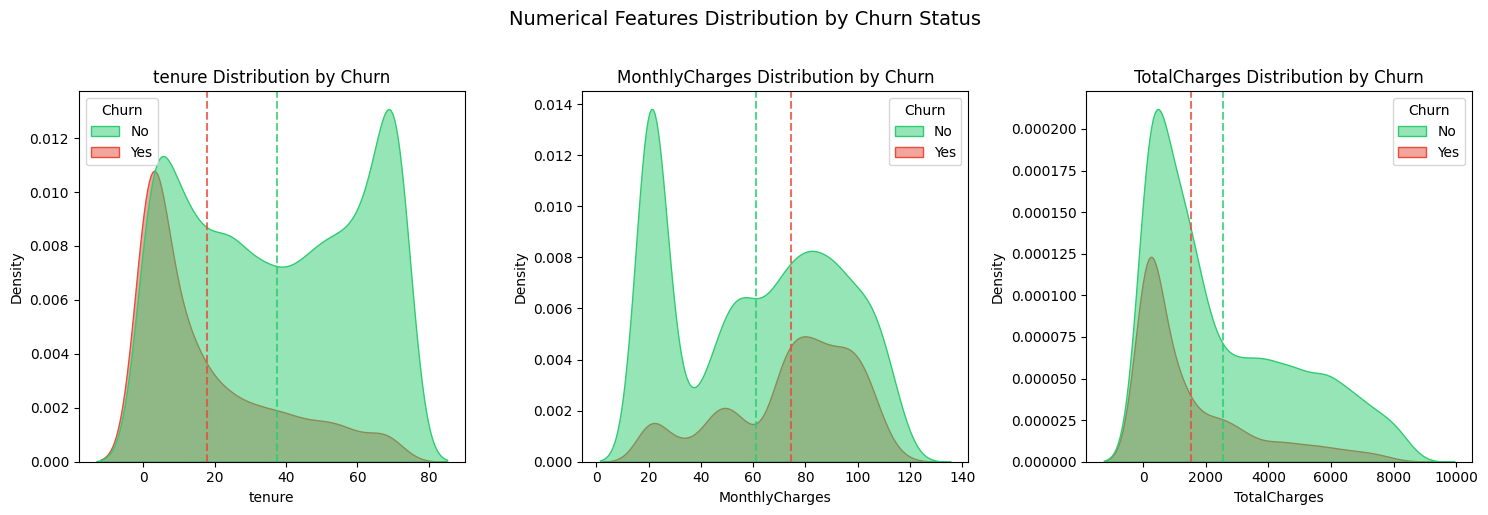


📈 Mean Comparison (Churned vs Retained):
  tenure: Churned=17.98, Retained=37.57 (Diff: -52.1%)
  MonthlyCharges: Churned=74.44, Retained=61.27 (Diff: +21.5%)
  TotalCharges: Churned=1531.80, Retained=2549.91 (Diff: -39.9%)


In [11]:
# 4. NUMERICAL FEATURE DISTRIBUTION BY CHURN
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for idx, col in enumerate(numerical_features):
    # KDE plot
    sns.kdeplot(data=df, x=col, hue='Churn', ax=axes[idx], fill=True, alpha=0.5,
                palette=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} Distribution by Churn', fontsize=12)
    
    # Add mean lines
    churned_mean = df[df['Churn'] == 'Yes'][col].mean()
    retained_mean = df[df['Churn'] == 'No'][col].mean()
    axes[idx].axvline(churned_mean, color='#e74c3c', linestyle='--', alpha=0.8)
    axes[idx].axvline(retained_mean, color='#2ecc71', linestyle='--', alpha=0.8)

plt.suptitle('Numerical Features Distribution by Churn Status', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Summary statistics
print("\n📈 Mean Comparison (Churned vs Retained):")
for col in numerical_features:
    churned = df[df['Churn'] == 'Yes'][col].mean()
    retained = df[df['Churn'] == 'No'][col].mean()
    diff_pct = ((churned - retained) / retained) * 100
    print(f"  {col}: Churned={churned:.2f}, Retained={retained:.2f} (Diff: {diff_pct:+.1f}%)")

/var/folders/sh/4gzgh4cn2ln7142sw6_8v5b00000gn/T/ipykernel_45595/3958362570.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_churn = df.groupby('Tenure_Cohort')['Churn_Binary'].agg(['mean', 'count'])
/var/folders/sh/4gzgh4cn2ln7142sw6_8v5b00000gn/T/ipykernel_45595/3958362570.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_counts = df.groupby(['Tenure_Cohort', 'Churn']).size().unstack()


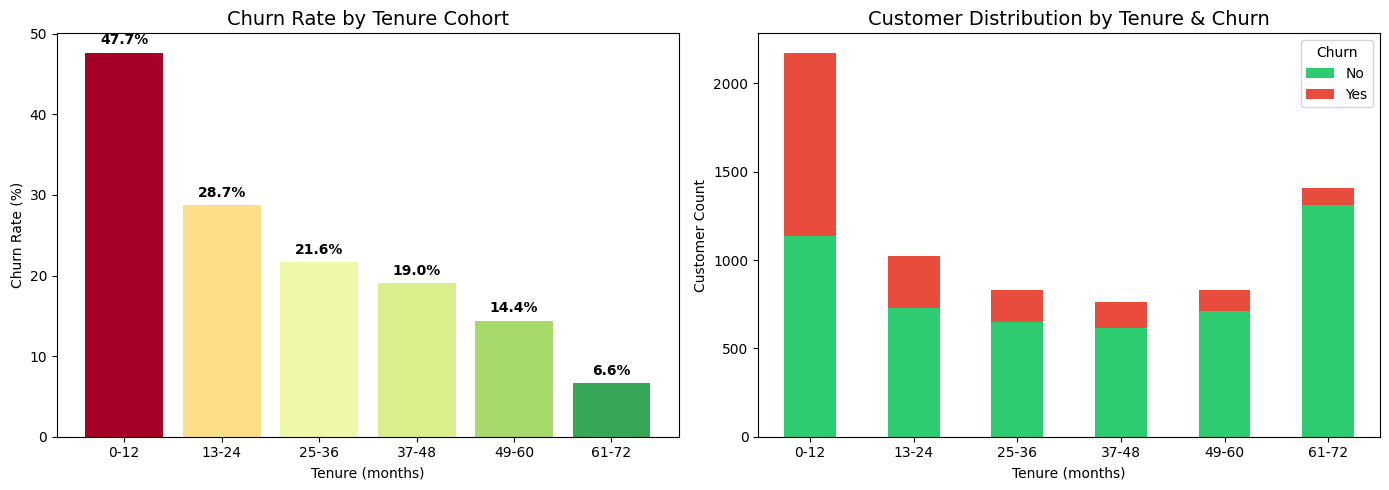


⏱️ Tenure Cohort Analysis:
                    mean  count
Tenure_Cohort                  
0-12           47.678161   2175
13-24          28.710938   1024
25-36          21.634615    832
37-48          19.028871    762
49-60          14.423077    832
61-72           6.609808   1407


In [12]:
# 5. COHORT ANALYSIS BY TENURE - Critical for Churn Prediction
# Create tenure cohorts
df['Tenure_Cohort'] = pd.cut(df['tenure'], 
                              bins=[0, 12, 24, 36, 48, 60, 72],
                              labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn rate by tenure cohort
cohort_churn = df.groupby('Tenure_Cohort')['Churn_Binary'].agg(['mean', 'count'])
cohort_churn['mean'] = cohort_churn['mean'] * 100

bars = axes[0].bar(cohort_churn.index, cohort_churn['mean'], 
                   color=plt.cm.RdYlGn_r(cohort_churn['mean']/cohort_churn['mean'].max()))
axes[0].set_xlabel('Tenure (months)')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_title('Churn Rate by Tenure Cohort', fontsize=14)
for bar, val in zip(bars, cohort_churn['mean']):
    axes[0].text(bar.get_x() + bar.get_width()/2, val + 1, f'{val:.1f}%', 
                ha='center', fontweight='bold')

# Customer count by cohort and churn
cohort_counts = df.groupby(['Tenure_Cohort', 'Churn']).size().unstack()
cohort_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_xlabel('Tenure (months)')
axes[1].set_ylabel('Customer Count')
axes[1].set_title('Customer Distribution by Tenure & Churn', fontsize=14)
axes[1].legend(title='Churn')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\n⏱️ Tenure Cohort Analysis:")
print(cohort_churn.to_string())

In [13]:
# 6. STATISTICAL SIGNIFICANCE TESTS
from scipy import stats

print("=" * 60)
print("STATISTICAL SIGNIFICANCE TESTS FOR FEATURE SELECTION")
print("=" * 60)

# Chi-Square Tests for Categorical Variables
print("\n📊 CHI-SQUARE TESTS (Categorical Features):")
print("-" * 50)

chi_square_results = []
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    significance = "✅ Significant" if p_value < 0.05 else "❌ Not Significant"
    chi_square_results.append({
        'Feature': col,
        'Chi2': chi2,
        'P-Value': p_value,
        'Significant': p_value < 0.05
    })
    print(f"{col:20s} | Chi2: {chi2:10.2f} | p-value: {p_value:.4e} | {significance}")

# T-Tests for Numerical Variables
print("\n📊 T-TESTS (Numerical Features):")
print("-" * 50)

t_test_results = []
for col in numerical_features:
    churned = df[df['Churn'] == 'Yes'][col]
    retained = df[df['Churn'] == 'No'][col]
    t_stat, p_value = stats.ttest_ind(churned, retained)
    significance = "✅ Significant" if p_value < 0.05 else "❌ Not Significant"
    t_test_results.append({
        'Feature': col,
        'T-Statistic': t_stat,
        'P-Value': p_value,
        'Significant': p_value < 0.05
    })
    print(f"{col:20s} | t-stat: {t_stat:10.2f} | p-value: {p_value:.4e} | {significance}")

STATISTICAL SIGNIFICANCE TESTS FOR FEATURE SELECTION

📊 CHI-SQUARE TESTS (Categorical Features):
--------------------------------------------------
gender               | Chi2:       0.48 | p-value: 4.8658e-01 | ❌ Not Significant
Partner              | Chi2:     158.73 | p-value: 2.1399e-36 | ✅ Significant
Dependents           | Chi2:     189.13 | p-value: 4.9249e-43 | ✅ Significant
PhoneService         | Chi2:       0.92 | p-value: 3.3878e-01 | ❌ Not Significant
MultipleLines        | Chi2:      11.33 | p-value: 3.4644e-03 | ✅ Significant
InternetService      | Chi2:     732.31 | p-value: 9.5718e-160 | ✅ Significant
OnlineSecurity       | Chi2:     850.00 | p-value: 2.6611e-185 | ✅ Significant
OnlineBackup         | Chi2:     601.81 | p-value: 2.0798e-131 | ✅ Significant
DeviceProtection     | Chi2:     558.42 | p-value: 5.5052e-122 | ✅ Significant
TechSupport          | Chi2:     828.20 | p-value: 1.4431e-180 | ✅ Significant
StreamingTV          | Chi2:     374.20 | p-value: 5.5290e-

/var/folders/sh/4gzgh4cn2ln7142sw6_8v5b00000gn/T/ipykernel_45595/2732889732.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_churn = df.groupby('Risk_Segment')['Churn_Binary'].mean() * 100


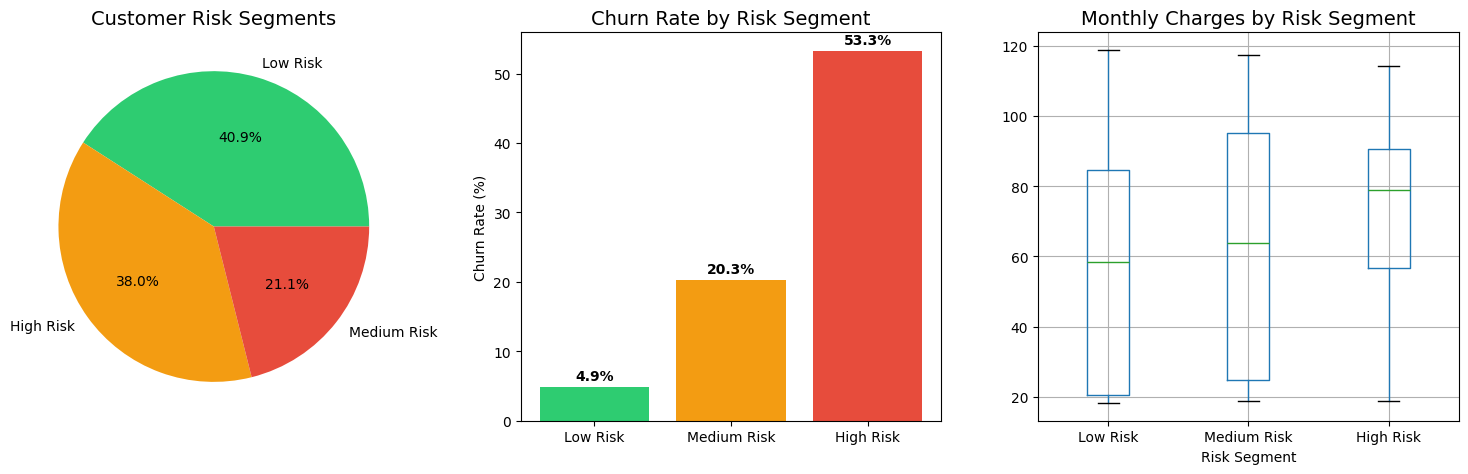


🎯 Risk Segment Summary:
              Count  Churn_Rate  Avg_Monthly  Avg_Tenure
Risk_Segment                                            
Low Risk       2881        0.05        56.93       48.77
Medium Risk    1485        0.20        62.96       30.39
High Risk      2677        0.53        74.18       15.82


/var/folders/sh/4gzgh4cn2ln7142sw6_8v5b00000gn/T/ipykernel_45595/2732889732.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Risk_Segment').agg({


In [15]:
# 7. CUSTOMER SEGMENTATION ANALYSIS (High-Risk vs Low-Risk)
# Identify key risk factors based on analysis

df['Risk_Score'] = 0

# High risk factors (based on typical churn patterns)
df.loc[df['Contract'] == 'Month-to-month', 'Risk_Score'] += 2
df.loc[df['tenure'] <= 12, 'Risk_Score'] += 2
df.loc[df['InternetService'] == 'Fiber optic', 'Risk_Score'] += 1
df.loc[df['PaymentMethod'] == 'Electronic check', 'Risk_Score'] += 1
df.loc[df['OnlineSecurity'] == 'No', 'Risk_Score'] += 1
df.loc[df['TechSupport'] == 'No', 'Risk_Score'] += 1

# Create risk segments
df['Risk_Segment'] = pd.cut(df['Risk_Score'], 
                            bins=[-1, 2, 4, 8],
                            labels=['Low Risk', 'Medium Risk', 'High Risk'])

# Visualize risk segments
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Segment distribution
segment_counts = df['Risk_Segment'].value_counts()
axes[0].pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%',
           colors=['#2ecc71', '#f39c12', '#e74c3c'])
axes[0].set_title('Customer Risk Segments', fontsize=14)

# Churn rate by segment
segment_churn = df.groupby('Risk_Segment')['Churn_Binary'].mean() * 100
bars = axes[1].bar(segment_churn.index, segment_churn.values, 
                   color=['#2ecc71', '#f39c12', '#e74c3c'])
axes[1].set_ylabel('Churn Rate (%)')
axes[1].set_title('Churn Rate by Risk Segment', fontsize=14)
for bar, val in zip(bars, segment_churn.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, val + 1, f'{val:.1f}%', 
                ha='center', fontweight='bold')

# Monthly charges by segment
df.boxplot(column='MonthlyCharges', by='Risk_Segment', ax=axes[2])
axes[2].set_title('Monthly Charges by Risk Segment', fontsize=14)
axes[2].set_xlabel('Risk Segment')
plt.suptitle('')

plt.tight_layout()
plt.show()

print("\n🎯 Risk Segment Summary:")
print(df.groupby('Risk_Segment').agg({
    'customerID': 'count',
    'Churn_Binary': 'mean',
    'MonthlyCharges': 'mean',
    'tenure': 'mean'
}).rename(columns={
    'customerID': 'Count',
    'Churn_Binary': 'Churn_Rate',
    'MonthlyCharges': 'Avg_Monthly',
    'tenure': 'Avg_Tenure'
}).round(2))

In [16]:
# 8. KEY INSIGHTS SUMMARY & FEATURE IMPORTANCE RANKING
print("=" * 70)
print("KEY INSIGHTS FOR CUSTOMER CHURN PREDICTION")
print("=" * 70)

print("""
📌 TOP CHURN PREDICTORS (based on analysis):

1. CONTRACT TYPE
   - Month-to-month contracts have highest churn (~42%)
   - Long-term contracts (1-2 years) have lowest churn (~11-3%)

2. TENURE
   - New customers (0-12 months) are at highest risk (~48% churn)
   - Loyalty increases significantly after 1st year
   - Customers with 60+ months tenure rarely churn (~7%)

3. INTERNET SERVICE
   - Fiber optic users churn more than DSL users
   - No internet service customers have lowest churn

4. PAYMENT METHOD
   - Electronic check users have highest churn (~45%)
   - Automatic payment methods have lower churn

5. SERVICE ADD-ONS
   - Customers WITHOUT OnlineSecurity, TechSupport, OnlineBackup 
     have higher churn rates
   - These services act as "stickiness" factors

6. MONTHLY CHARGES
   - Higher monthly charges correlate with higher churn
   - Churned customers avg: ~$74/mo vs Retained: ~$61/mo
""")

# Feature Importance Summary DataFrame
feature_importance = pd.DataFrame({
    'Feature': ['Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 
                'InternetService', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
    'Importance': ['Critical', 'Critical', 'High', 'High', 'Medium', 'Medium', 'Medium', 'Low'],
    'Churn_Impact': ['Month-to-month = High Risk', 'Lower tenure = High Risk',
                     'No Security = High Risk', 'No Support = High Risk',
                     'Fiber Optic = Higher Risk', 'E-check = High Risk',
                     'Higher = Higher Risk', 'Correlated with tenure']
})
print("\n🔑 FEATURE IMPORTANCE RANKING:")
print(feature_importance.to_string(index=False))

KEY INSIGHTS FOR CUSTOMER CHURN PREDICTION

📌 TOP CHURN PREDICTORS (based on analysis):

1. CONTRACT TYPE
   - Month-to-month contracts have highest churn (~42%)
   - Long-term contracts (1-2 years) have lowest churn (~11-3%)

2. TENURE
   - New customers (0-12 months) are at highest risk (~48% churn)
   - Loyalty increases significantly after 1st year
   - Customers with 60+ months tenure rarely churn (~7%)

3. INTERNET SERVICE
   - Fiber optic users churn more than DSL users
   - No internet service customers have lowest churn

4. PAYMENT METHOD
   - Electronic check users have highest churn (~45%)
   - Automatic payment methods have lower churn

5. SERVICE ADD-ONS
   - Customers WITHOUT OnlineSecurity, TechSupport, OnlineBackup 
     have higher churn rates
   - These services act as "stickiness" factors

6. MONTHLY CHARGES
   - Higher monthly charges correlate with higher churn
   - Churned customers avg: ~$74/mo vs Retained: ~$61/mo


🔑 FEATURE IMPORTANCE RANKING:
        Feature 